# Open CV

Welcome to this tutorial on OpenCV (Open Source Computer Vision Library)<br>
OpenCV is one of the most popular open-source libraries for computer vision, image processing, and machine learning. It provides a wide range of tools to work with images and videos, making it widely used in fields such as:
- Image and video processing and filtering
- Object detection and tracking
- Robotics and autonomous systems
- Machine learning and deep learning applications
- and more

Why OpenCV?
- Free and open-source
- Fast and optimized for real-time applications
- Large community and extensive documentation
- Works with Python, C++, and other languages

**Contact me:**  
- GitHub: [yasinpurraisi](https://github.com/yasinpurraisi)  
- Email: yasinpourraisi@gmail.com  
- Telegram: [yasinprsy](https://t.me/yasinprsy)


## Requirements
Before getting started, make sure the following Python libraries are installed

In [ ]:
!pip install opencv-python numpy matplotlib pillow


## Import libraries

In [1]:
# import Open CV library
import cv2

import matplotlib.pyplot as plt
import numpy as np

## Read and Display images

In [ ]:
# Load image
im = cv2.imread("images\Cat.jpg")

# Display image
cv2.imshow("Cat",im)

cv2.waitKey()
cv2.destroyAllWindows()

## type and shape

In [36]:
print(f"im type : {type(im)}")
print(f"im shape (height,width,channels) : {im.shape}")

im type : <class 'numpy.ndarray'>
im shape (height,width,channels) : (350, 280, 3)


## write image
- <code>JPG</code> : a lossy format that compresses images by discarding some details, resulting in smaller file sizes but lower fidelity. Best for photos and natural images where exact pixel accuracy isn’t critical.

- <code>PNG</code> : a lossless format that preserves every pixel exactly, often producing larger files. It supports transparency and is ideal for graphics, text, or images that require sharp detail.

In [37]:
# cv2.imwrite("output-name.outputformat", im)
cv2.imwrite("output_cat.jpg", im)
cv2.imwrite("output_cat.png", im)

True

## Matplotlib
in OpenCV images load as BGR(instead of RGB)

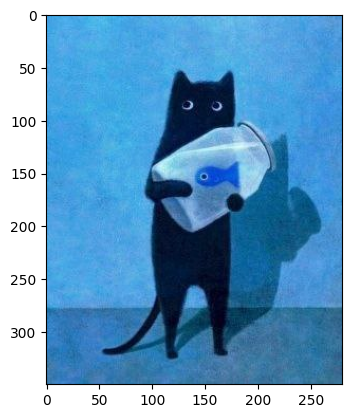

In [38]:
import matplotlib.pyplot as plt

plt.imshow(im)

convert image to RGB

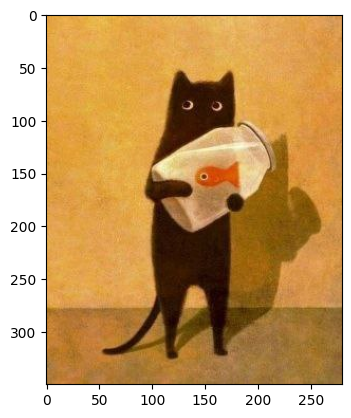

In [39]:
# cv2.cvtColor(input image,switch)
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)

read image in RGB

In [40]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

## Changing pixel values

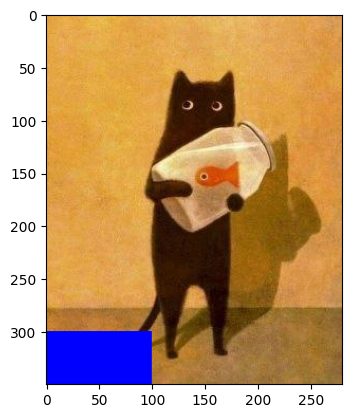

In [41]:
RGB_im[300:400,:100,:]= (0,0,255)

plt.imshow(RGB_im)

## Greyscale images

Greyscale image shape : (350, 280)


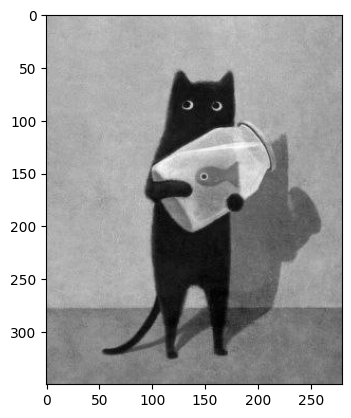

In [43]:
im = cv2.imread("images/Cat.jpg")
# convert to Greyscale
grey_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

# read in Greyscale
grey_im1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_GRAYSCALE)

# Greyscale shape : (height,width) and one channel (0-255)
print(f"Greyscale image shape : {grey_im.shape}")

#plot image
plt.imshow(grey_im1,cmap="gray")

## Cropping image

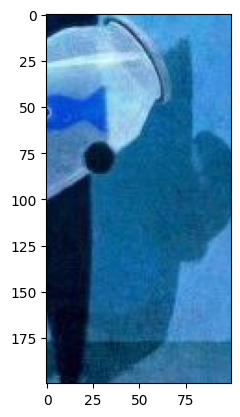

In [47]:
cropped_im = im[100:300,150:250]

plt.imshow(cropped_im)

## Color spaces
using the <code>split</code> the image seperates into 3 channels. each channel is just a ***2D array (height,width)*** of intensity values. When <code>merge</code>, they form the full ***3D color image(height,width,color channels)***.

(350, 280)

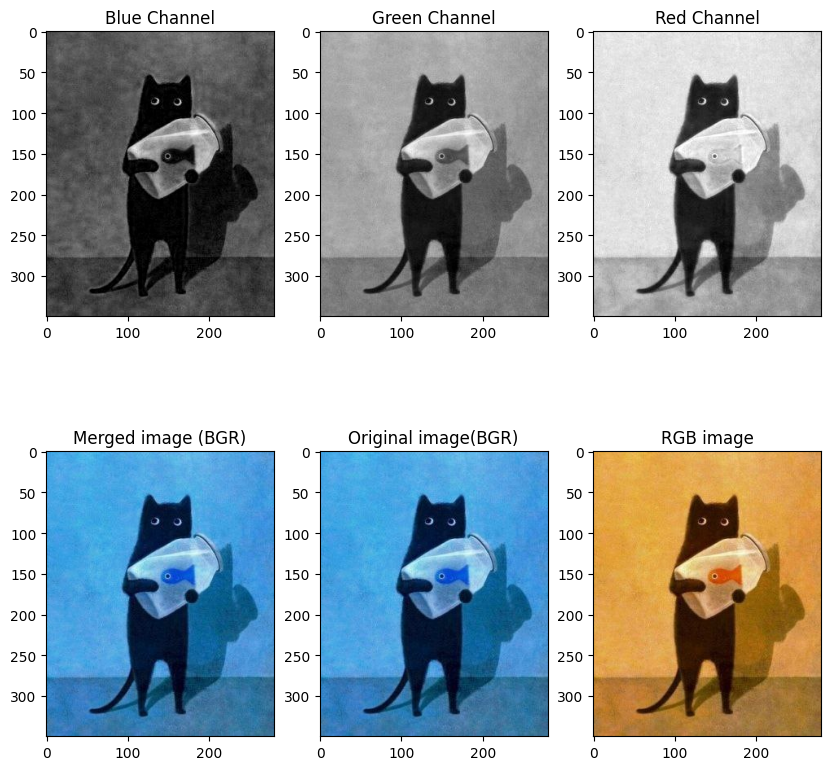

In [69]:
im = cv2.imread("images/Cat.jpg")
# Split
B,G,R = cv2.split(im)

# merge
merged_im = cv2.merge([B,G,R])

plt.figure(figsize=[10,10])
plt.subplot(231);plt.imshow(B,cmap='gray');plt.title("Blue Channel")
plt.subplot(232);plt.imshow(G,cmap='gray');plt.title("Green Channel")
plt.subplot(233);plt.imshow(R,cmap='gray');plt.title("Red Channel")
plt.subplot(234);plt.imshow(merged_im);plt.title("Merged image (BGR)")
plt.subplot(235);plt.imshow(im);plt.title("Original image(BGR)")
plt.subplot(236);plt.imshow(im[:,:,::-1]);plt.title("RGB image")
G.shape

## Copy() method
When assigning an image array directly using <code>Red = im</code>, the variable <code>Red</code> does not create an independent copy; instead, it references the same memory location as <code>im</code>. Consequently, any modifications applied to <code>Red</code> will also affect <code>im</code>. To prevent such unintended side effects, it is advisable to create an explicit duplicate of the array using the <code>copy()</code> method.

Text(0.5, 1.0, 'Original image')

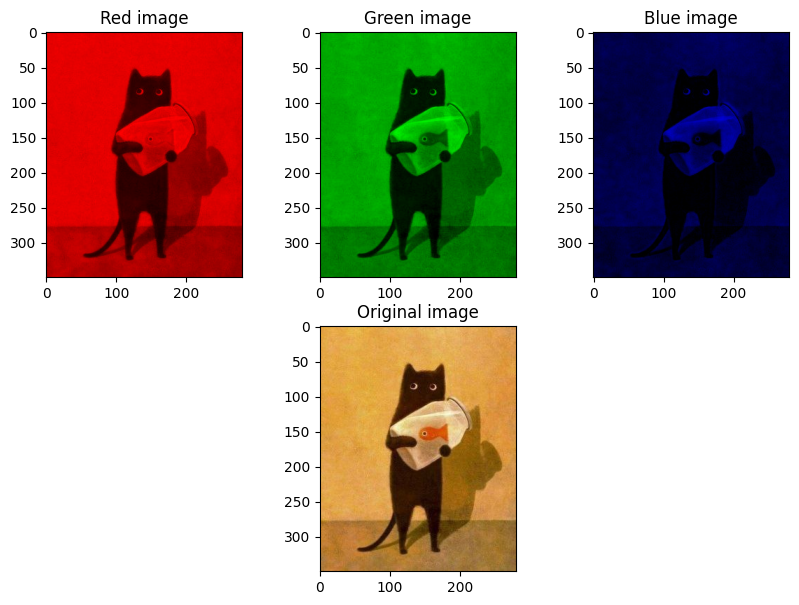

In [95]:
# Read image in RGB
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

# Red
Red = im.copy()
Red[:,:,1]=0
Red[:,:,2]=0

# Green 
Green = im.copy()
Green[:,:,0]=0
Green[:,:,2]=0

# Blue
Blue = im.copy()
Blue[:,:,0]=0
Blue[:,:,1]=0

plt.figure(figsize=[10,7])
plt.subplot(231);plt.imshow(Red);plt.title("Red image")
plt.subplot(232);plt.imshow(Green);plt.title("Green image")
plt.subplot(233);plt.imshow(Blue);plt.title("Blue image")
plt.subplot(235);plt.imshow(im);plt.title("Original image")


## Changing values of color channels
In OpenCV, images are typically stored as NumPy arrays with the data type <code>uint8</code> (unsigned 8-bit integers). This means that each pixel value is represented within the range 0 to 255. When performing arithmetic operations on <code>uint8</code> arrays, NumPy applies modular (wrap-around) arithmetic: values greater than 255 loop back around starting from 0, and values below 0 wrap down from 255. For example, 250 + 20 would result in 14 instead of being capped at 255. To avoid this undesired overflow behavior, OpenCV provides functions like <code>cv2.add()</code>, which perform saturated arithmetic. In saturated arithmetic, values are clipped to remain within the valid range: anything above 255 is set to 255, and anything below 0 is set to 0. This ensures more predictable and visually correct results when adjusting image brightness or manipulating color channels.

Text(0.5, 1.0, 'Original image')

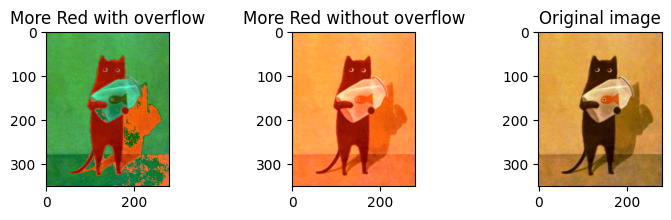

In [142]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

R,G,B = cv2.split(im)
more_red_not_overflow = cv2.merge([cv2.add(R, 100),G,B])
more_red_overflow = cv2.merge([R+100,G,B])

plt.figure(figsize=[9,2])
plt.subplot(131);plt.imshow(more_red_overflow);plt.title("More Red with overflow")
plt.subplot(132);plt.imshow(more_red_not_overflow);plt.title("More Red without overflow")
plt.subplot(133);plt.imshow(im);plt.title("Original image")

## HSV

**HSV** stands for **Hue, Saturation, and Value**. It is an alternative way to represent colors that separates **color information** from **intensity**, which can be very useful in image processing tasks such as color detection and filtering.

Components of HSV:

1. **Hue (H):**  
   - Represents the **type of color** (e.g., red, green, blue).  
   - In OpenCV, hue ranges from **0 to 179** (instead of 0–360) due to 8-bit representation.  

2. **Saturation (S):**  
   - Indicates the **vividness or purity** of the color.  
   - Ranges from **0 (gray/pale)** to **255 (fully saturated)**.  

3. **Value (V):**  
   - Represents the **brightness** of the color.  
   - Ranges from **0 (black)** to **255 (full brightness)**.

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

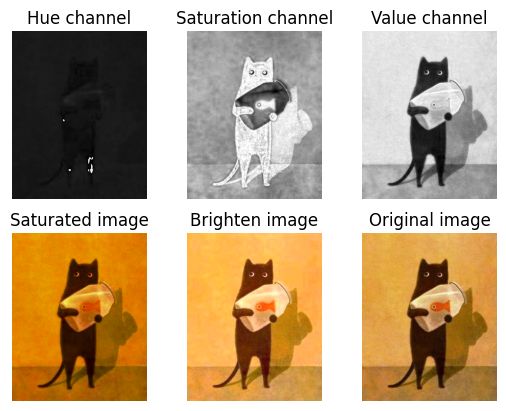

In [ ]:
im = cv2.imread("images/Cat.jpg")
hsv_im = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

saturated_im = cv2.merge([hsv_im[:,:,0],cv2.add(hsv_im[:,:,1],100),hsv_im[:,:,2]])
brighten_im  = cv2.merge([hsv_im[:,:,0],hsv_im[:,:,1],cv2.add(hsv_im[:,:,2],50)])

plt.subplot(231);plt.imshow(hsv_im[:,:,0],cmap='gray');plt.title("Hue channel");plt.axis('off')
plt.subplot(232);plt.imshow(hsv_im[:,:,1],cmap='gray');plt.title("Saturation channel");plt.axis('off')
plt.subplot(233);plt.imshow(hsv_im[:,:,2],cmap='gray');plt.title("Value channel");plt.axis('off')
plt.subplot(234);plt.imshow(cv2.cvtColor(saturated_im,cv2.COLOR_HSV2RGB));plt.title("Saturated image");plt.axis('off')
plt.subplot(235);plt.imshow(cv2.cvtColor(brighten_im,cv2.COLOR_HSV2RGB));plt.title("Brighten image");plt.axis('off')
plt.subplot(236);plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB));plt.title("Original image");plt.axis('off')

## $\alpha$ channel
Most color images use three channels: Red, Green, and Blue (RGB). However, some image formats (like PNG) support an additional channel called the Alpha channel.The alpha channel controls transparency (or opacity) of each pixel.
It is stored as an 8-bit value (0–255)
- 0 → fully transparent (invisible pixel)
- 255 → fully opaque (fully visible pixel)
- Values in between → semi-transparent (partially visible).

To preserve the alpha channel when loading an image, it is recommended to use the flag <code>cv2.IMREAD_UNCHANGED</code>

¯\_( ͡° ͜ʖ ͡°)_/¯this image with png format has 4 channels (height,width,4 channels) : (800, 800, 4)


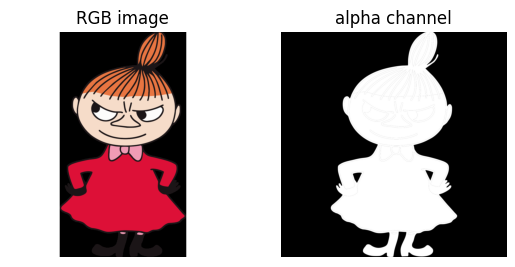

In [ ]:
im = cv2.imread("images/Little-My.png",cv2.IMREAD_UNCHANGED)
test = cv2.imread("images/Cat.jpg")
BGR_im = im[:,:,:3]
alpha_im = im[:,:,3]

plt.subplot(121);plt.imshow(BGR_im[:,:,::-1]);plt.title("RGB image");plt.axis('off')
plt.subplot(122);plt.imshow(alpha_im,cmap='gray');plt.title("alpha channel");plt.axis('off')
print(f"¯\_( ͡° ͜ʖ ͡°)_/¯this image with png format has 4 channels (height,width,4 channels) : {im.shape}")

## Bitwise Operations
In image processing, bitwise operations are used to manipulate pixel values at the binary level.
- AND : <code>cv2.bitwise_and(A, B)</code>
- OR  : <code>cv2.bitwise_or(A, B)</code>
- XOR : <code>cv2.bitwise_xor(A, B)</code>
- NOT : <code>cv2.bitwise_not(A)</code>

***!A and B shape should be the same*** (A.shape == B.shape)

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

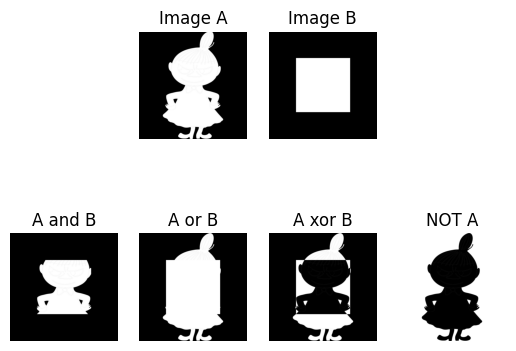

In [39]:
# A
im = cv2.imread("images/Little-My.png",cv2.IMREAD_UNCHANGED)
A = im[:,:,3]
# B
B = np.zeros((800,800),np.uint8)
cv2.rectangle(B,(200,200),(600,600),255,-1)

plt.subplot(242);plt.imshow(A,cmap='gray');plt.title("Image A");plt.axis('off')
plt.subplot(243);plt.imshow(B,cmap='gray');plt.title("Image B");plt.axis('off')
plt.subplot(245);plt.imshow(cv2.bitwise_and(A,B),cmap='gray');plt.title("A and B");plt.axis('off')
plt.subplot(246);plt.imshow(cv2.bitwise_or(A,B),cmap='gray');plt.title("A or B");plt.axis('off')
plt.subplot(247);plt.imshow(cv2.bitwise_xor(A,B),cmap='gray');plt.title("A xor B");plt.axis('off')
plt.subplot(248);plt.imshow(cv2.bitwise_not(A),cmap='gray');plt.title("NOT A");plt.axis('off')

## Create transparent PNG image

True

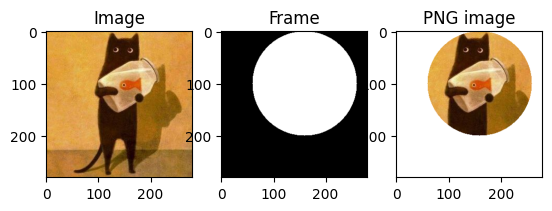

In [ ]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
im = im[50:330] # crop image to 280*280

png_im = np.zeros((280,280,4),np.uint8)
png_im[:,:,:3] = im 
frame = np.zeros((280,280),np.uint8)
cv2.circle(frame,(160,100),100,(255,255,255),-1)
png_im[:,:,3]  = frame

plt.subplot(131);plt.imshow(im);plt.title("Image")
plt.subplot(132);plt.imshow(frame,cmap='gray');plt.title("Frame")
plt.subplot(133);plt.imshow(png_im);plt.title("PNG image")

# cv2.imwrite("Cat-png.png",cv2.cvtColor(png_im,cv2.COLOR_BGRA2RGBA))

## Draw line
<code>cv2.line(img, starting point, ending point, color, thickness)</code>
 - Example : </code>cv2.line(img, (50,50), (200,50), (0,255,0), 3)</code>

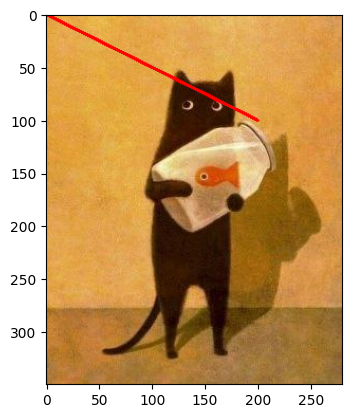

In [10]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Line
cv2.line(im,(0,0),(200,100),(255,0,0),2)
plt.imshow(im)

## Draw rectangle
<code>cv2.rectangle(img, starting vertex, opposite vertex, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.rectangle(img, (60,60), (180,180), (255,0,0), 2)</code>

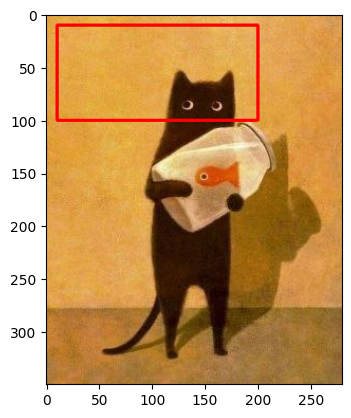

In [12]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Rectangle
cv2.rectangle(im,(10,10),(200,100),(255,0,0),2)
plt.imshow(im)

## Draw circle
<code>cv2.circle(img, center, radius, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.circle(img, (120,120), 50, (0,0,255), -1)</code>

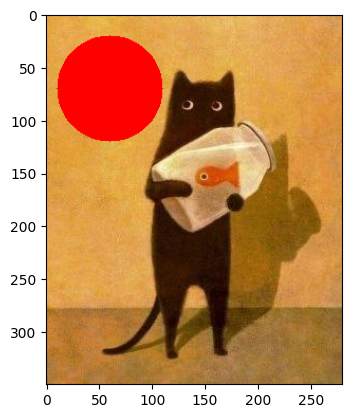

In [25]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Circle
cv2.circle(im,(60,70),50,(255, 0, 0),-1)
plt.imshow(im)

## Draw ellipse
<code>cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.ellipse(img, (150,150), (80,40), 30, 0, 360, (255,255,0), 2)</code>

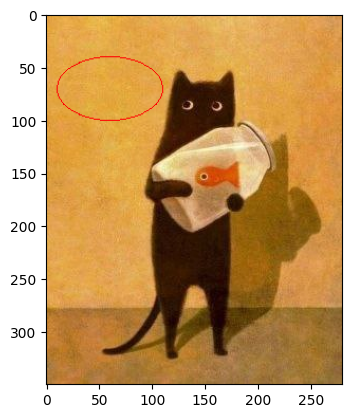

In [37]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Ellipse
cv2.ellipse(im,(60,70),(50,30),0,0,360,(255, 0, 0),1)
plt.imshow(im)

## Draw polyline
<code>cv2.polylines(img, [pts], isClosed, color, thickness)</code><br>
<code>pts</code> → array of points [[x1,y1],[x2,y2],...].<br>
<code>isClosed = True</code> to connect last point to first (polygon), otherwise <code>False</code>.
- Example :<br> <code>pts = np.array([[50,50],[200,50],[170,150],[80,150]], np.int32)</code><br>
                  <code>pts = pts.reshape((-1,1,2))</code> OpenCV’s cv2.polylines() expects the points in a very specific shape<br> 
                  <code>cv2.polylines(img, [pts], True, (0,255,255), 2)</code><br>

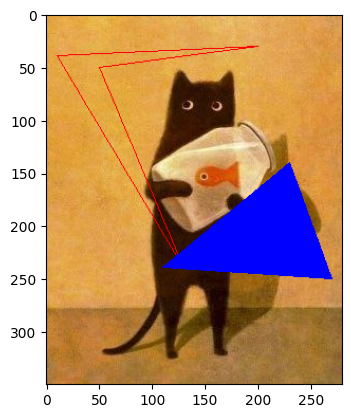

In [57]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Red Polylines
pts = np.array([[50,50],[130,240],[10,39],[200,30]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(im,[pts],True,(255,0,0),1)

# Blue Filled Polygons
pts1 = np.array([[270,250],[230,140],[110,239]], np.int32)
pts1 = pts1.reshape((-1,1,2))
cv2.fillPoly(im, [pts1], (0,0,255))


plt.imshow(im)

## Write text
<code>cv2.putText(img, text, (x, y), font, fontScale, color, thickness, lineType)</code><br>
- Example : <code>cv2.putText(img, "Text", (50,250),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)</code>

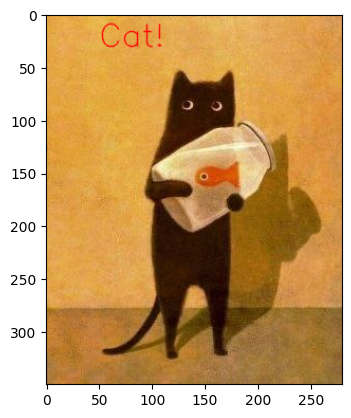

In [67]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

cv2.putText(im,"Cat!",(50,30),cv2.FONT_ITALIC,1,(255,0,0),1,cv2.LINE_AA)
plt.imshow(im)

## Arithmetic operations
***cv2.add()***
- Performs pixel-wise addition of two images (or an image and a scalar).
- Iit uses saturation arithmetic. if the sum exceeds 255, the value is capped at 255 (no overflow).
- Example: <code>brighter = cv2.add(img, 50)   # adds 50 to all pixel values</code>

***cv2.subtract()***
- Performs pixel-wise subtraction.
- Also uses saturation arithmetic. if the result goes below 0, it is set to 0 (no underflow).
- Example: <code>darker = cv2.subtract(img, 50)   # subtracts 50 from all pixels</code>

***cv2.addWeighted()***
- Blends two images together using a weighted sum.
- Formula: $$\alpha.img1+\beta.img2+\gamma$$
- α and β : weights for each image (control transparency).
- γ : scalar added to the result (brightness adjustment).
- Example : <code>blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)</code>

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

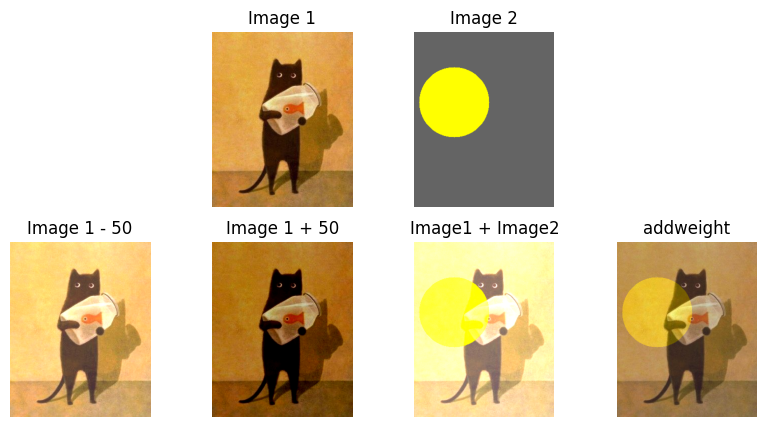

In [21]:
img1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
img2 = np.ones(im.shape,dtype='uint8')*100
cv2.circle(img2,(80,140),70,(255,255,0),-1)

# add
brighter = cv2.add(img1, 50)
# add
added = cv2.add(img1,img2)
# subtract
darker = cv2.subtract(img1, 50)
# addweighted
blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.figure(figsize=[10,5])
plt.subplot(242);plt.imshow(img1);plt.title("Image 1");plt.axis('off')
plt.subplot(243);plt.imshow(img2);plt.title("Image 2");plt.axis('off')
plt.subplot(245);plt.imshow(brighter);plt.title("Image 1 - 50");plt.axis('off')
plt.subplot(246);plt.imshow(darker);plt.title("Image 1 + 50");plt.axis('off')
plt.subplot(247);plt.imshow(added);plt.title("Image1 + Image2");plt.axis('off')
plt.subplot(248);plt.imshow(blended);plt.title("addweight");plt.axis('off')
